In [22]:
import pandas as pd
import numpy as np
np.set_printoptions(legacy='1.25')

In [2]:
import os 
os.getcwd()

'/home/flavio/repositories/teaching/sicss-2025/teaching-notebooks/notebooks'

In [3]:
adult_census = pd.read_csv("../datasets/adult-census-numeric.csv")

In [4]:
adult_census.head()

,age,capital-gain,capital-loss,hours-per-week,class
0,41,0,0,92,<=50K
1,48,0,0,40,<=50K
2,60,0,0,25,<=50K
3,37,0,0,45,<=50K
4,73,3273,0,40,<=50K


This dataset has all we need
- the target class we want to predict: `class`
- the data we want to use to train the model: remaining columns

Let's now separate the predictors from the target

### Separate the data and the target

In [5]:
target_name = "class"
target = adult_census[target_name]
target

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
39068     <=50K
39069     <=50K
39070      >50K
39071     <=50K
39072      >50K
Name: class, Length: 39073, dtype: object

In [6]:
data = adult_census.drop(columns=[target_name])
data.head()

,age,capital-gain,capital-loss,hours-per-week
0,41,0,0,92
1,48,0,0,40
2,60,0,0,25
3,37,0,0,45
4,73,3273,0,40


Now, let's explore the predictors, or *features*, in some more detail.

In [7]:
data.columns

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

In [9]:
n_rows = data.shape[0]
n_cols = data.shape[1]
print(f"The dataset contains {n_rows} samples and {n_cols} features.")

The dataset contains 39073 samples and 4 features.


### Fit a model and make predictions

**Note**
- we use k-nearest neighbors strategy. It works by taking `k` samples that are closest to the sample of interest. It makes the prediction based on the majority class of these samples
- The algorithm is rarely used in practice, but it is intuitive. This is why we use it here. Later, we introduce better models.


The `fit` method trains the model from the input (features) and the target data.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
_ = model.fit(data, target)

#### What is going on?

Here is a figure:
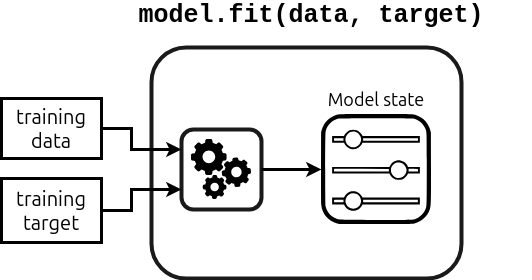

The `fit` method
- takes training data (features) and training target (separately)
- does some computation -> learning algorithm
- stores the fitted model in the model state
- the model state can be re-used later for prediction and transformations (we'll see)


#### Now, let's make some predictions

In [11]:
target_predicted =model.predict(data)

#### What is going on?
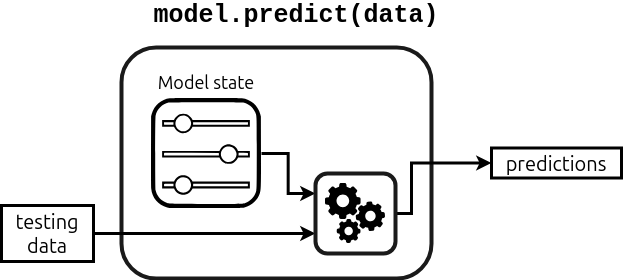

- the model uses the `predict` prediction function combines the model state with some testing data to make new predictions.



**Conclusion**: scikit learn has a standard interface, and `fit` and `predict` are methods in many of the scikit classes.


In [12]:
target_predicted[:5]

array([' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K'], dtype=object)

In [13]:
# let's compare to the actual data
target[:5]

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: class, dtype: object

In [14]:
# and more explicitly
target[:5] == target_predicted[:5]

0    False
1     True
2     True
3     True
4     True
Name: class, dtype: bool

In [19]:
n_correct = (target[:5] == target_predicted[:5]).sum()

In [16]:
print(f"Number of correct predictions: {n_correct} / 5")

Number of correct predictions: 4 / 5


To get a more precise assessment, compute the average success rate

In [23]:
(target == target_predicted).mean()

0.8242776341719346

Therefore, the model makes a correct prediction for about 82 samples out of 100. How good is this? Can we trust it?

### Train-test data split
- when building a machine learning model, it is important that we check how well it performs on data it has not seen.
- in other words, generalization is more than memorization: a model may be able to perfectly memorize its training data, but this does not imply that it performs equally well on data it has not seen
- in general, it is harder to make prediction on never-seen data than it is on data seen before.

We can evaluate the model by keeping some of the data out of the training set, and then look at the predictions for these held-out data. -> "training data", "test data"

In the current example, we actually have some data that were left out from the original data set. Let's load them and check predictions.

In [24]:
adult_census_test = pd.read_csv("../datasets/adult-census-numeric-test.csv")

separate again the input features from the target

In [25]:
target_test = adult_census_test[target_name]
data_test = adult_census_test.drop(columns=[target_name])

In [26]:
nrow_test, ncol_test = data_test.shape
print(f"The testing dataset contains {nrow_test} samples and {ncol_test} features.")

The testing dataset contains 9769 samples and 4 features.


We can use the `score` method, which does the work of checking the predictions for us. 
Note that for different classifier, the performance metric may differ.

In [29]:
accuracy = model.score(data_test, target_test)
model_name = model.__class__.__name__
print(f"The test accuracy using a {model_name} is {accuracy:.3f}")

The test accuracy using a KNeighborsClassifier is 0.804


### Summarizing

The mechanism of the `score` method is illustrated here:

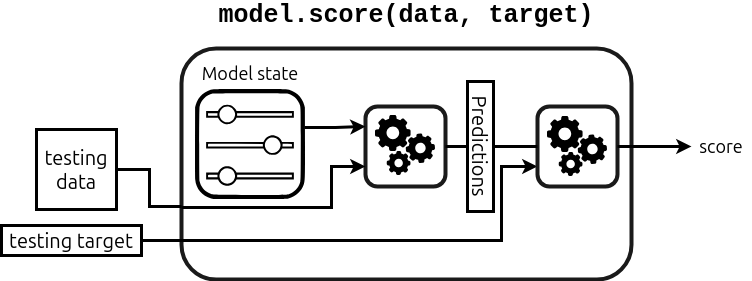

To compute the score:
1. the model computes predictions, using `predict` method
2. uses a scoring function to compare the true `y` and the predictions
3. returns the score

(**model** is the generic term used to refer to objects whose goodness of fit can be measures with the `score` method)


Above, we saw that the predictiosn on the test set are indeed a bit lower than on the training set (0.80 vs 0.82). It shows how important it is to evaluate a model on data it has not seen before. We will discuss this in more detail later.


# Exercise: adapt your own first model

The goal of this exercise is to fit a similar model as we just did to get familiar with manipulating scikit-learn objects and in particular the `.fit/.predict/.score` API.

Before we used `model = KNeighborsClassifier()`. All scikit-learn models can be created without arguments. This is convenient because it means that you don’t need to understand the full details of a model before starting to use it.

One of the KNeighborsClassifier parameters is n_neighbors. It controls the number of neighbors we are going to use to make a prediction for a new data point.

#### 1. What is the default value of the n_neighbors parameter? 
Hint: Look at the documentation on the scikit-learn website or directly access the description inside your notebook by running the following cell. This will open a pager pointing to the documentation.
```python
from sklearn.neighbors import KNeighborsClassifier

KNeighborsClassifier?
```

#### 2. Create a KNeighborsClassifier model with n_neighbors=50
a. Fit this model on the train data and target that we used before
b. Use your model to make predictions on the first 10 data points inside the data. Do they match the actual target values?
c. Compute the accuracy on the training data.
d. Now load the test data from "../datasets/adult-census-numeric-test.csv" and compute the accuracy on the test data.

#### 3. (Optional) Find the optimal n_neighbors
What is the optimal number of neighbors to fit a K-neighbors classifier on this dataset?



## Solutions

### (1) Default value of n_neighbors

In [49]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier?

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

**Solution: 5**

### (2) Create KNeighborsClassifier with n_neighbors=50

In [50]:
model = KNeighborsClassifier(n_neighbors=50)

In [51]:
_ = model.fit(data, target)

In [52]:
predictions_in = model.predict(data)

In [53]:
predictions_in[:10] == target[:10]

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9    False
Name: class, dtype: bool

In [54]:
accuracy_train = model.score(data, target)
print(f"Accuracy on training set: {accuracy_train:.3f}")

Accuracy on training set: 0.829


In [55]:
accuracy_test = model.score(data_test, target_test)

In [57]:
print(f"Accuracy on test set: {accuracy_test:.3f}")

Accuracy on test set: 0.818


### Intuitions on linear models
https://esciencecenter-digital-skills.github.io/scikit-learn-mooc/linear_models/linear_models_slides.html

logistic regression
- line is a probability that y=1
- discuss confidence along the line
- linear model: internally it takes a linear combination of (input features * coefficients). *linear in parameters*, ie cannot have `a*b`
- the combination is then a probability between 0 and 1.

2-dim logistic regression:
- stronger lines -> probability closer to 0 or 1
- weaker lines -> probs closer to 0.5
- *linear* line -> linear separation boundary; in other words, takes linear combination of input features * parameters

multi-class prediction
- straight lines -> from linear model
- but why are there kinks?

linear models not suited to all data
- not always linearly separable in the input space
- if not: if we want to keep using a linear model, we need to find new features, and hope that the data become linearly separably in the new input space.
- example: completely new feature, or a transformation of the original features (square or similar) -> in 2d, the function may not appear linear anymore, but it's still a linear model. intuitively: (i) in higher-dimensional input space, it's still linear. (ii) linear in parameters.

take-home
- simple and fast baselines; easy to set up; easy to interpret
- can underfit -> feature engineering
- with a lot of features, linear models are hard to beat